## GitHub Project Link - 
https://github.com/mohansameer1983/concrete-strength-prediction-aiml

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

In [2]:
cdf = pd.read_csv("concrete.csv")
cdf.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
cdf.shape

(1030, 9)

In [4]:
cdf.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
cdf.info()  # All columns are numerical, including Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
cdf.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

## Univariate Analysis

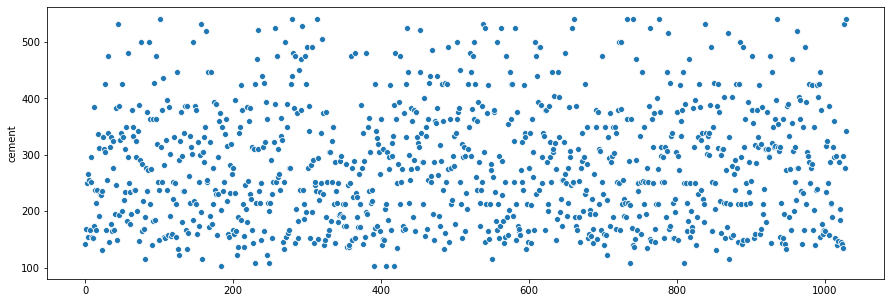

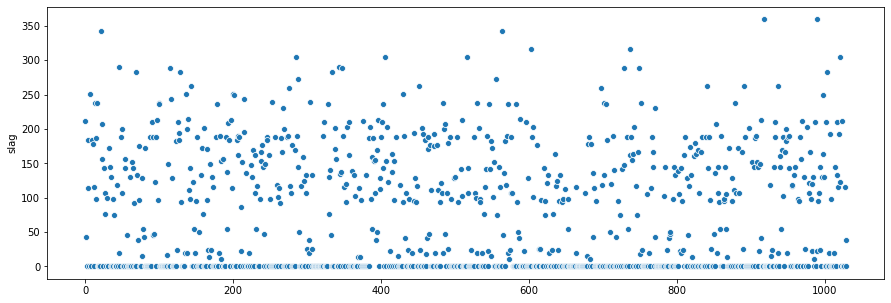

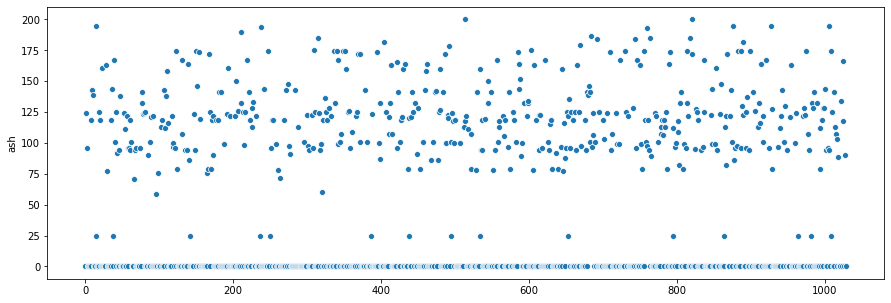

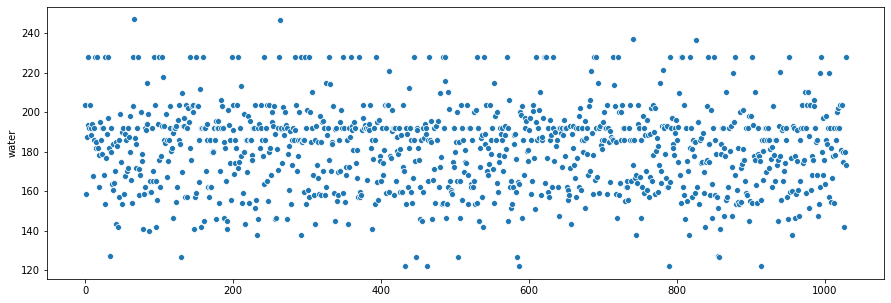

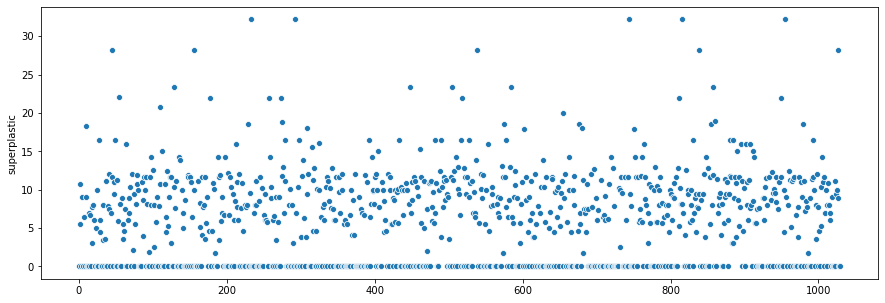

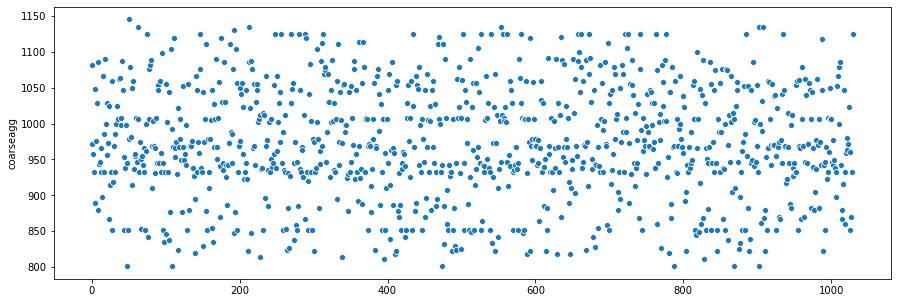

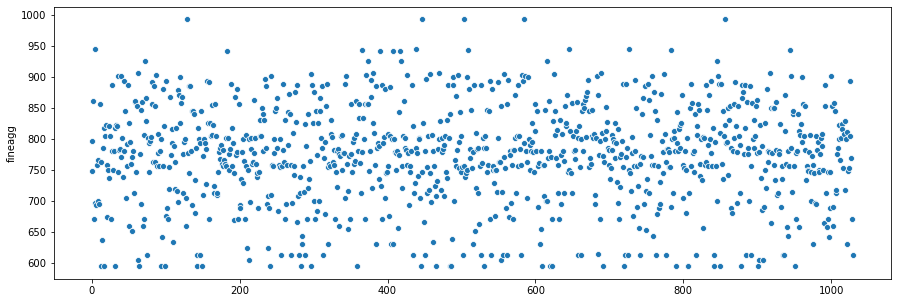

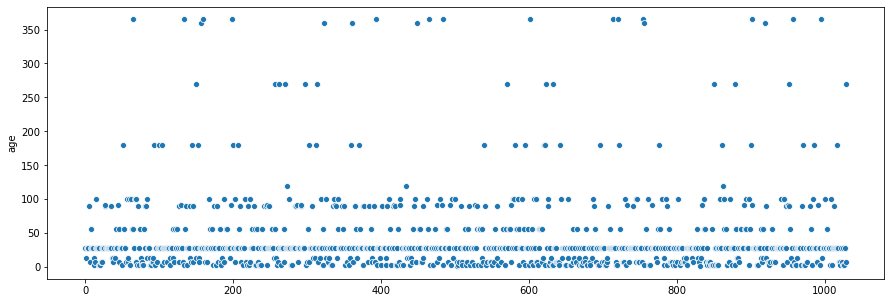

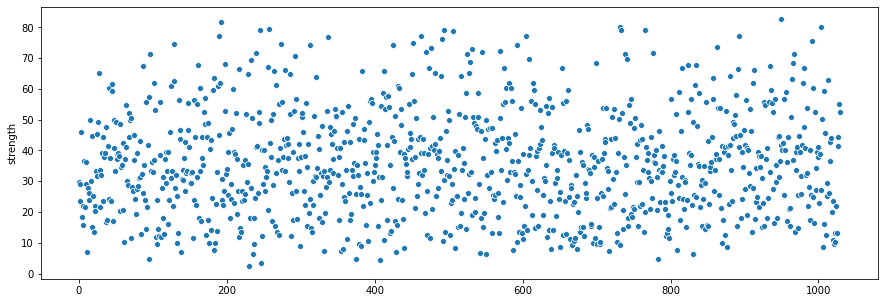

In [7]:
# Univariate Analysis
for i in cdf.columns:
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=cdf,y=i,x=cdf.index)
    plt.show()

# Check Duplicates in data

In [8]:
##Identify duplicates records in the data
dupes = cdf.duplicated()
sum(dupes)

25

In [9]:
##here we can see that there are 25 duplicated rows. We want to remove the duplicate rows.
#Removing Duplicates
cdf =cdf.drop_duplicates()

In [10]:
##Check duplicates records in the data again
dupes = cdf.duplicated()
sum(dupes)

0

In [11]:
## Check missing values
cdf.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

In [12]:
cdf.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


# Outliers in Data

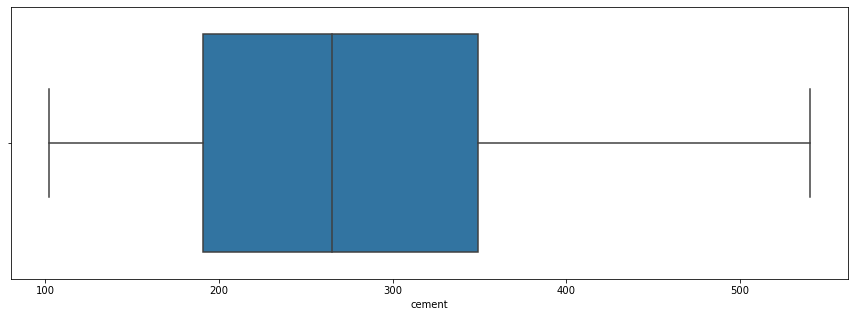

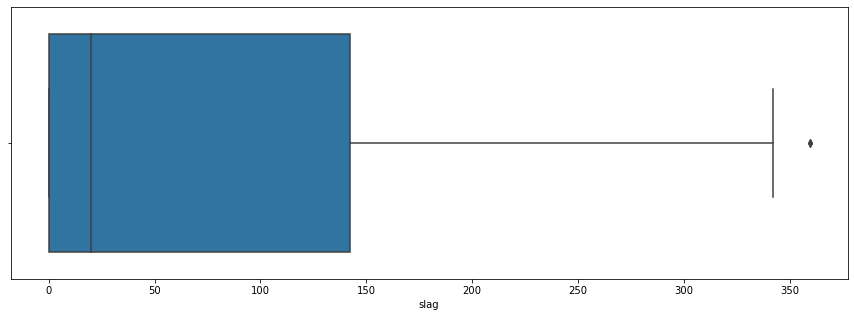

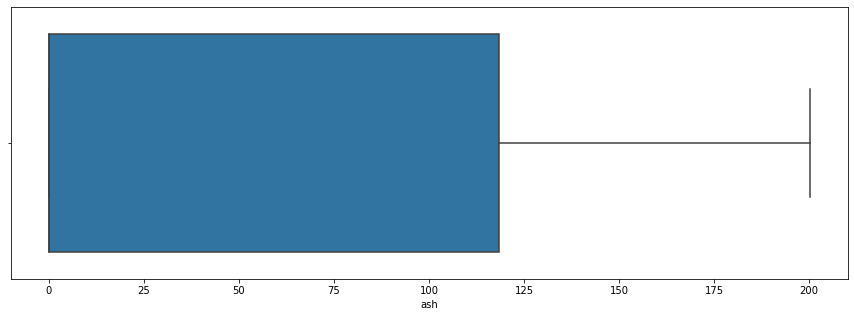

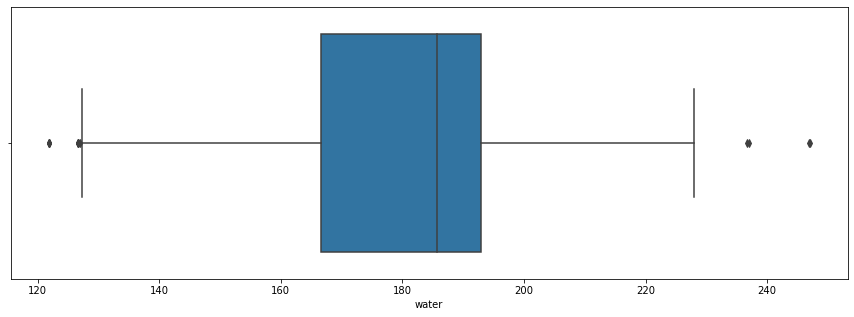

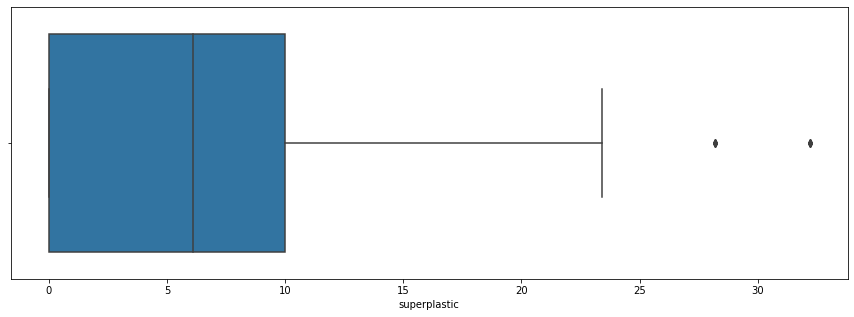

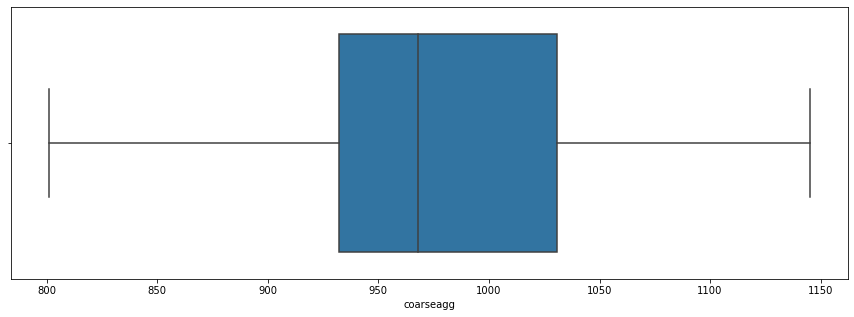

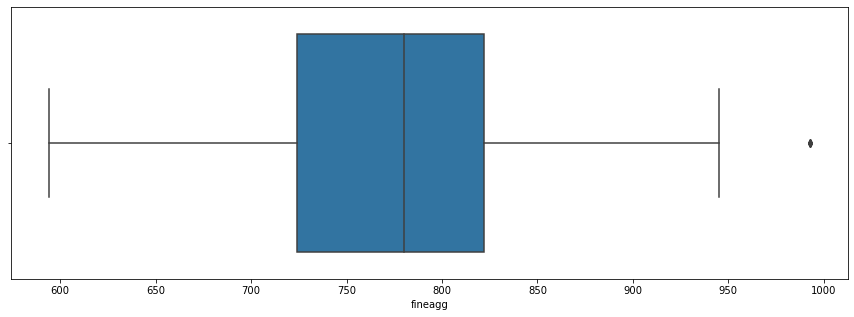

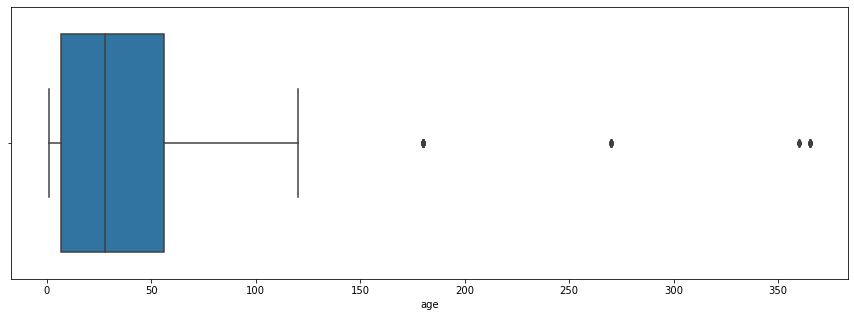

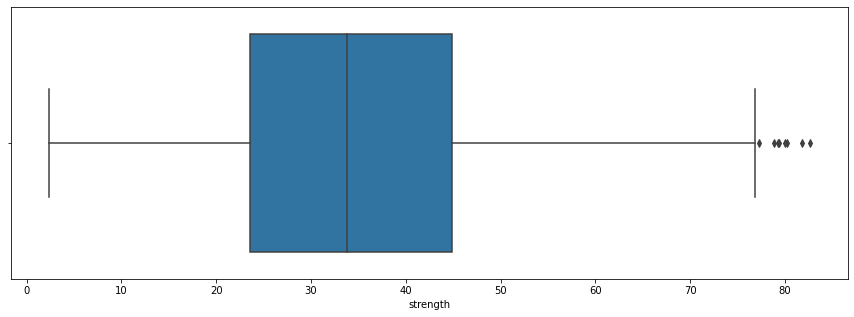

In [13]:
# Boxplot is very helpful in quickly analyzing outliers in data
for i in cdf.columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=cdf[i])   # box plot
    plt.show()


**Note:** Above boxplots shows quite clear outliers in following columns: slag, water, superplastic, fineagg, age
Let's analyze more and remove significant ones.

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(cdf))
z

array([[1.31679229, 1.6249842 , 0.86537497, ..., 0.30122194, 0.28031213,
        0.32932808],
       [1.05215156, 0.34650182, 1.07148566, ..., 0.29279711, 0.50008208,
        0.72129915],
       [0.2745297 , 0.83647066, 0.62583631, ..., 1.10225704, 0.28031213,
        0.37049118],
       ...,
       [0.02139508, 0.51036313, 0.54169273, ..., 0.05464799, 0.28031213,
        0.55475714],
       [0.60760608, 0.39526649, 0.86537497, ..., 1.27880047, 3.51856854,
        1.21705309],
       [2.50611568, 0.83647066, 0.86537497, ..., 1.98863456, 0.60996706,
        1.06653128]])

**Note:** Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [15]:
threshold = 3
np.where(z > threshold)

(array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
         256,  262,  263,  270,  291,  296,  311,  321,  359,  391,  444,
         460,  477,  527,  553,  559,  588,  609,  618,  699,  706,  728,
         738,  739,  799,  820,  832,  860,  880,  897,  898,  928,  932,
         934,  966,  970, 1001, 1003], dtype=int64),
 array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
        7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
        7, 1, 7, 4, 7], dtype=int64))

**Note:** The first array contains the list of row numbers and second array respective column numbers, which mean z[21][1] have a Z-score higher than 3.

In [16]:
print(z[21][1])

3.1355279550659487


**21st record on column 'slag' is an outlier.**

In [17]:
Q1 = cdf.quantile(0.25)
Q3 = cdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [18]:
np.where((cdf < (Q1 - 1.5 * IQR)) | (cdf > (Q3 + 1.5 * IQR)))

(array([  33,   44,   51,   64,   66,   93,   99,  103,  129,  129,  133,
         144,  149,  152,  156,  157,  159,  190,  192,  198,  199,  207,
         232,  245,  256,  257,  262,  263,  270,  291,  296,  300,  310,
         311,  321,  357,  359,  368,  391,  428,  443,  443,  444,  458,
         460,  477,  496,  496,  498,  527,  528,  559,  568,  571,  571,
         574,  581,  588,  606,  608,  609,  618,  628,  682,  699,  706,
         707,  718,  724,  728,  738,  739,  759,  772,  799,  809,  820,
         832,  839,  839,  843,  860,  879,  880,  893,  897,  898,  927,
         928,  932,  934,  947,  961,  966,  970,  978,  992, 1001, 1003],
       dtype=int64),
 array([3, 4, 7, 7, 3, 7, 7, 7, 3, 6, 7, 7, 7, 7, 4, 7, 7, 8, 8, 7, 7, 7,
        4, 8, 7, 8, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 6, 7, 3,
        7, 7, 3, 6, 8, 4, 7, 7, 7, 3, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 3, 4, 7, 7, 7, 3, 4, 3, 4, 7, 3, 6, 7, 7, 7, 7, 3, 1, 7, 8,
        7, 4, 7,

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Correcting Outliers

**Note: We are going to try two techniques of optimizing outliers - Z-Score and IQR. After testing with two, IQR method to replace upper outliers with upper whisker gave better model in terms of accuracy. So, you can see we continued with that dataframe from there on.**

### Z-Score Removal Technique

In [27]:
# Z-Score
cdf_1 = cdf[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
cdf_1.shape, cdf.shape

((967, 9), (1005, 9))

In [28]:
cdf_z = cdf.copy()   #make a copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    cdf_z.iloc[i,j] = cdf.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [29]:
z = np.abs(stats.zscore(cdf_z))
np.where(z > threshold)  # New outliers detected after imputing the original outliers


(array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
         256,  262,  263,  270,  291,  296,  311,  321,  359,  391,  444,
         460,  477,  527,  553,  559,  588,  609,  618,  699,  706,  728,
         738,  739,  799,  820,  832,  860,  880,  897,  898,  928,  932,
         934,  966,  970, 1001, 1003], dtype=int64),
 array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
        7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
        7, 1, 7, 4, 7], dtype=int64))

### IQR Removal Technique

In [30]:
# IQR 
cdf_2 = cdf[~((cdf < (Q1 - 1.5 * IQR)) |(cdf > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
cdf_2.shape

(911, 9)

In [159]:
cdf_i = cdf.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(cdf_i < Q1 - 1.5 * IQR)[0], np.where(cdf_i < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    cdf_i.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(cdf_i > Q3 + 1.5 * IQR)[0], np.where(cdf_i > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    cdf_i.iloc[i,j] = whisker[j]
    

In [160]:
cdf_i.shape, cdf.shape

((1005, 9), (1005, 9))

In [161]:
cdf_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   float64
 8   strength      1005 non-null   float64
dtypes: float64(9)
memory usage: 78.5 KB


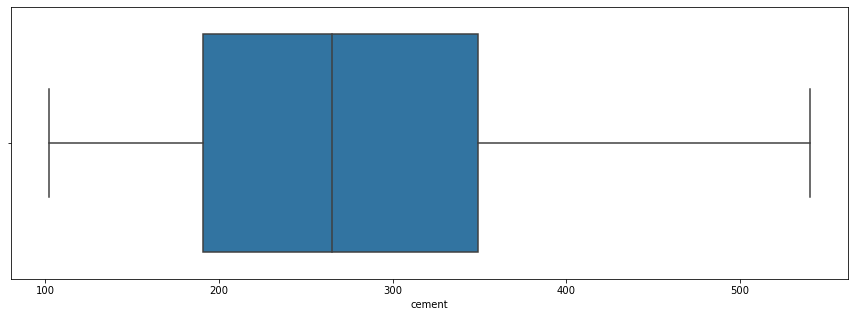

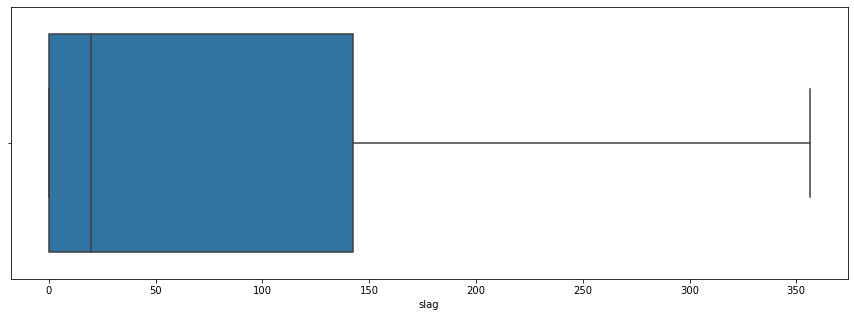

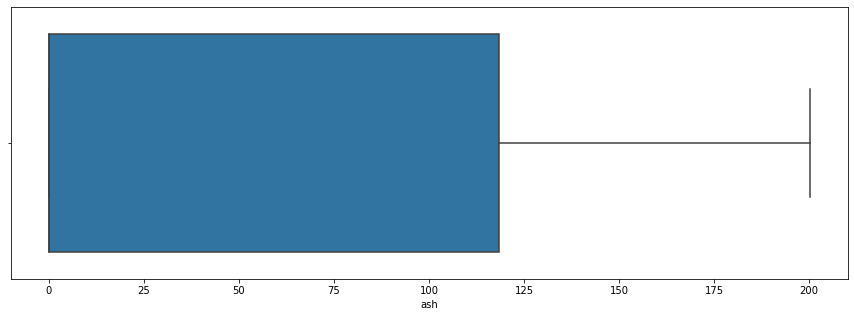

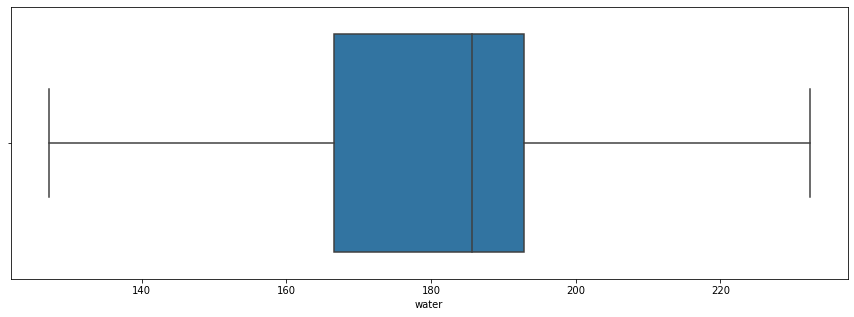

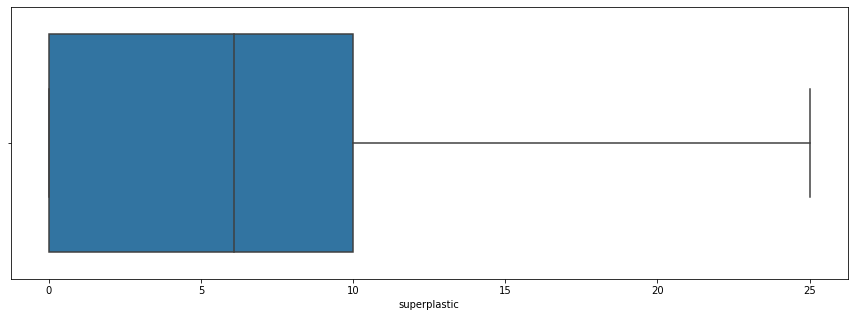

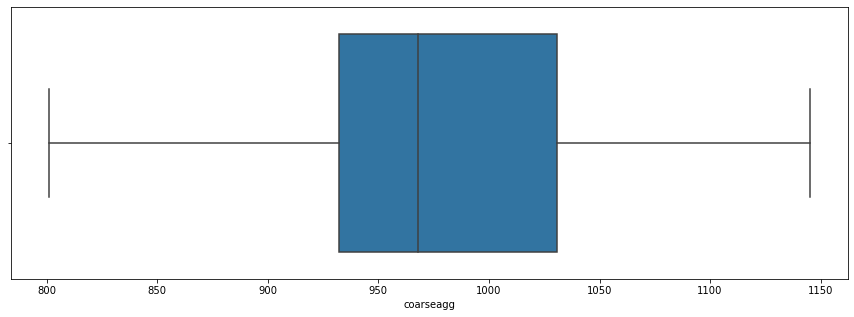

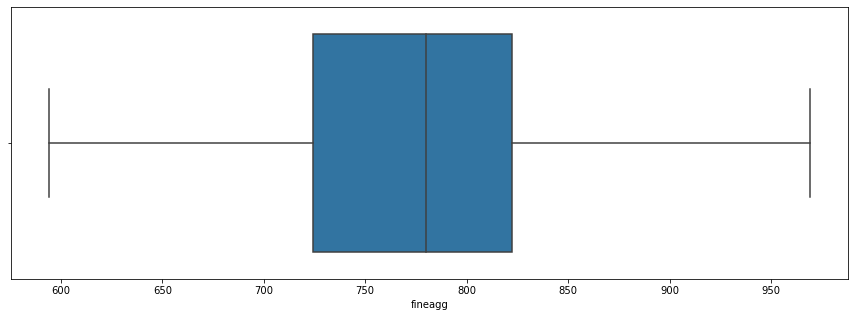

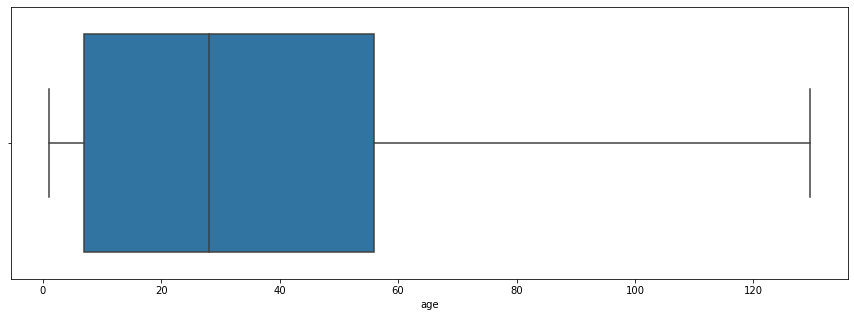

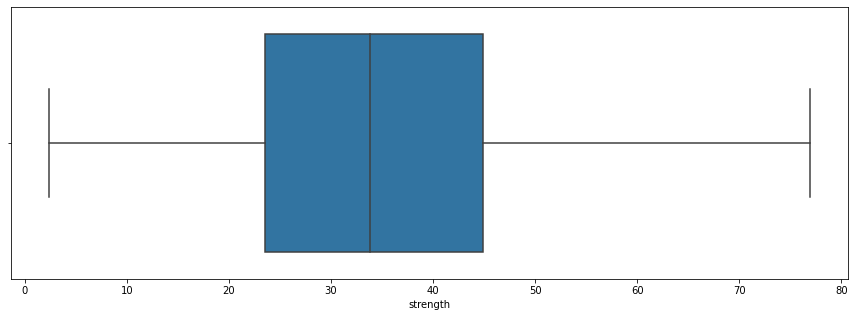

In [34]:
# Boxplots - IQR based
for i in cdf_i.columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=cdf_i[i])   # box plot
    plt.show()

# Bi-Variate Analysis

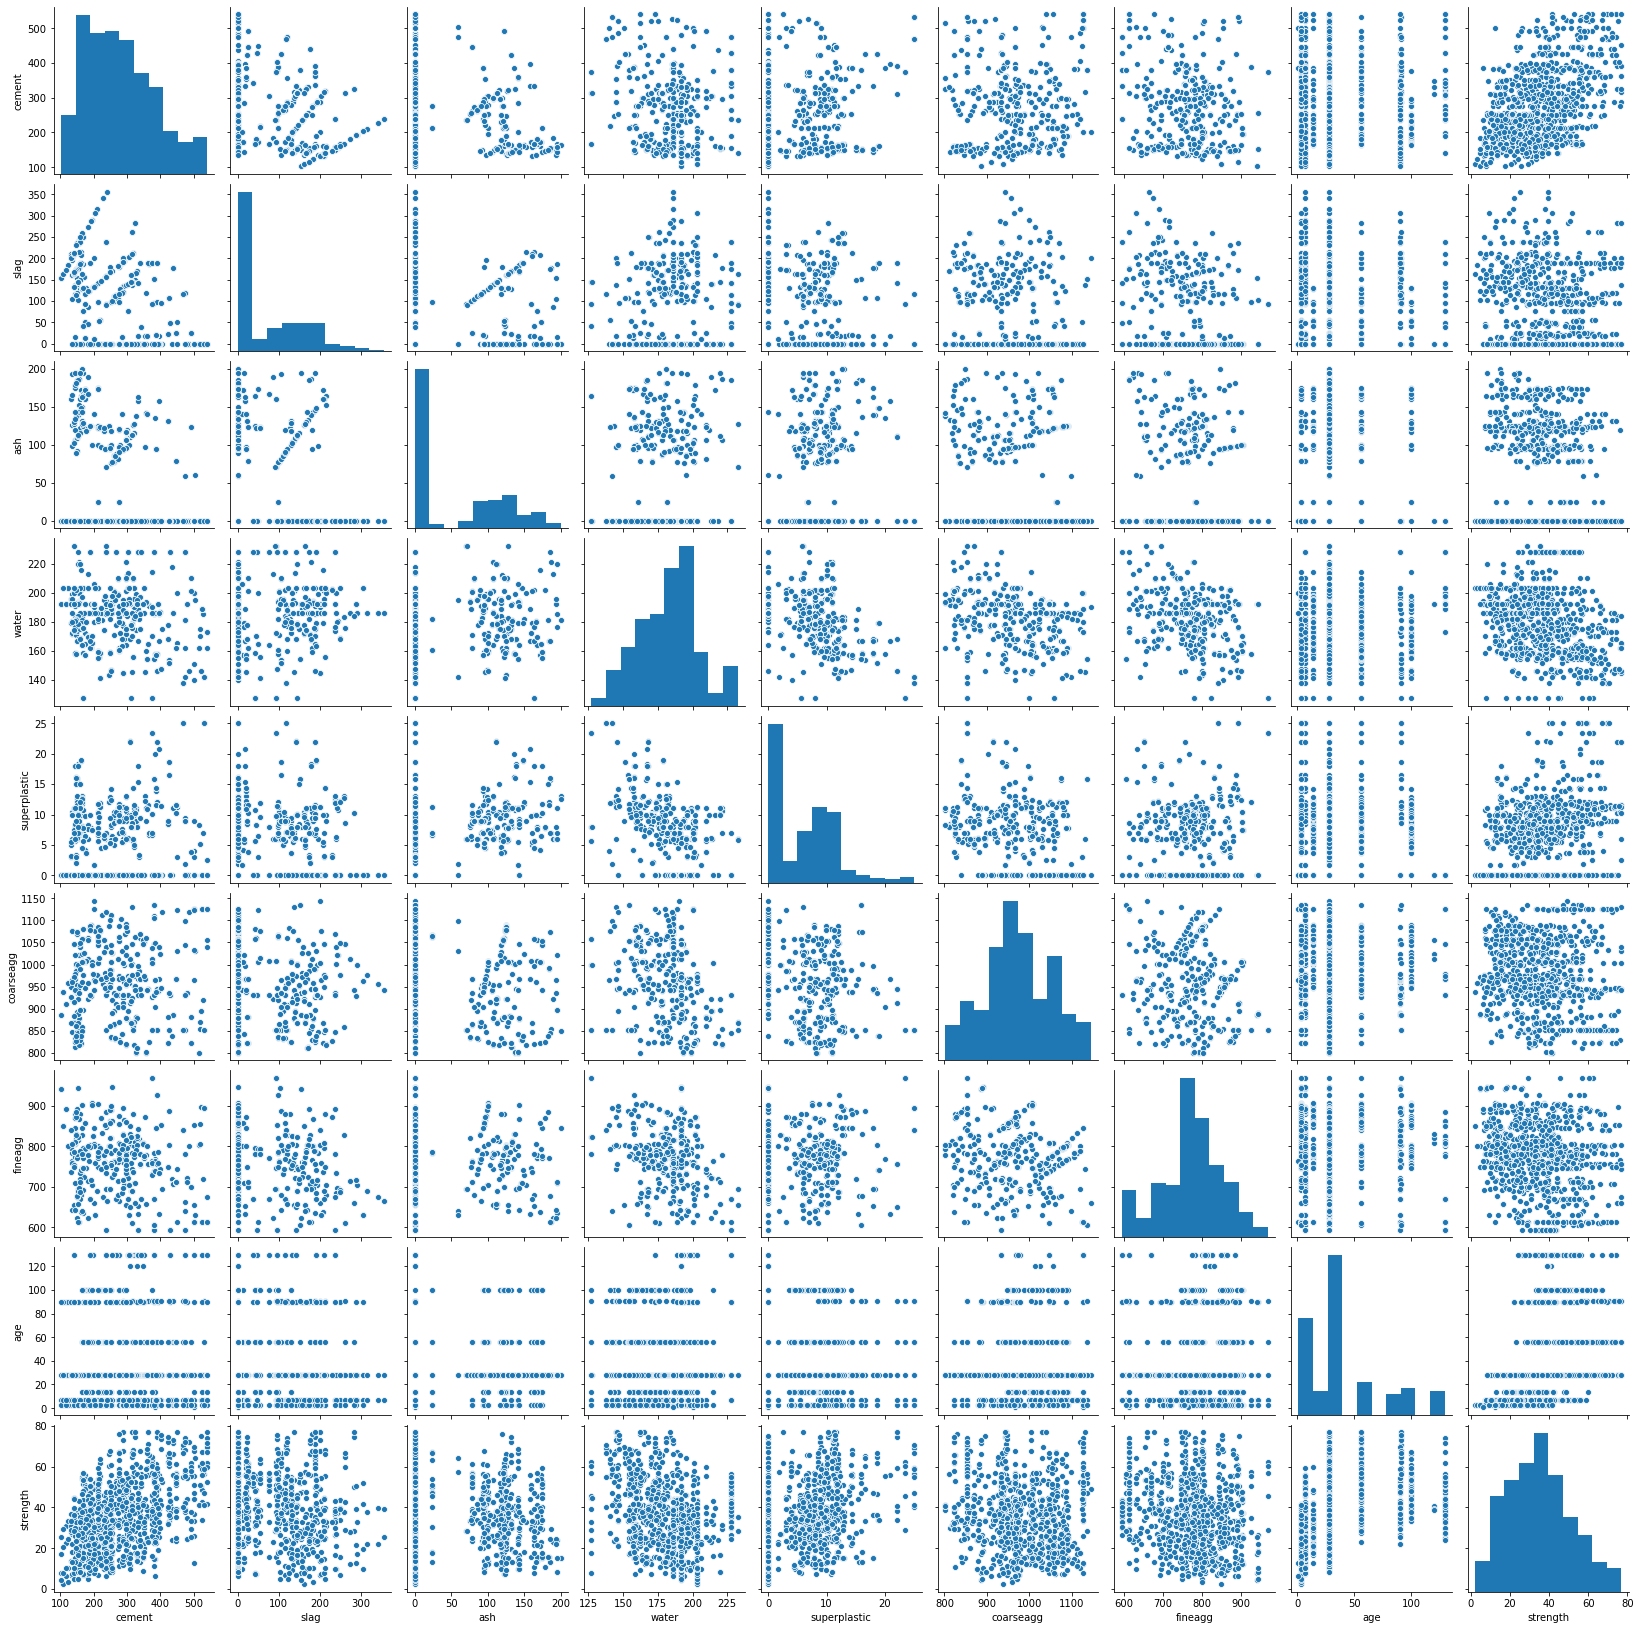

In [35]:
# Pairplot is the simplest graphical way to visaully check correlation between different columns of data
sns.pairplot(cdf_i)

In [162]:
cdf_i.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,0.488690
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.102440
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.079685
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,-0.271381
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.342983
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.145794
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.188509
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.476726
strength,0.488690,0.102440,-0.079685,-0.271381,0.342983,-0.145794,-0.188509,0.476726,1.000000


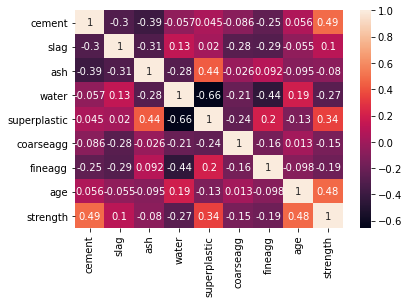

In [163]:
sns.heatmap(cdf_i.corr(), annot=True)  # plot the correlation coefficients as a heatmap

**Note: Above correlation matrix and heatmap of correlation shows following relations between variables:**
* Negative correlation between superplastic and water
* Negative correlation between water and fineagg
* Positive correlation between cement and dependent variable strength. This obviously make sense.
* Positive correlation between age and dependent variable strength.
* Positive correlation between superplastic and ash.

* Coareseagg, fineagg are weak predictors and we can remove them
* Ash is mild predictor, we can try removing it

## Scaling

In [164]:
cdf_i.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [165]:
# Scaling helps in normalizing the feature values, which can make otherwise make the model unstable. 
#The default scale for the MinMaxScaler is to rescale variables into the range [0,1]
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

scaler = MinMaxScaler()

#Keeping separate DF for further processing
cdf_s=cdf_i.copy()

cols_to_scale = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']

# transform data
cdf_s[cols_to_scale] = scaler.fit_transform(cdf_s[cols_to_scale].to_numpy())

cdf_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   float64
 8   strength      1005 non-null   float64
dtypes: float64(9)
memory usage: 78.5 KB


In [166]:
cdf_s.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,0.403268,0.238229,0.0,0.202511,0.372146,0.563927,1.0
slag,1005.0,0.202210,0.241825,0.0,0.000000,0.056140,0.400000,1.0
ash,1005.0,0.277543,0.320879,0.0,0.000000,0.000000,0.591204,1.0
water,1005.0,0.522023,0.201128,0.0,0.375000,0.556559,0.625000,1.0
superplastic,1005.0,0.239260,0.228979,0.0,0.000000,0.244000,0.400000,1.0
coarseagg,1005.0,0.504002,0.225522,0.0,0.380814,0.485465,0.668605,1.0
fineagg,1005.0,0.476126,0.213401,0.0,0.347420,0.495934,0.608452,1.0
age,1005.0,0.288530,0.279086,0.0,0.046693,0.210117,0.428016,1.0
strength,1005.0,0.441176,0.217532,0.0,0.284182,0.422048,0.570509,1.0


## Split Data

In [167]:
# Get data model ready, where 'strength' column is target variable.
# Dropping feature columns which are not strong predictors
y = cdf_s['strength']
X = cdf_s.drop(['strength','coarseagg','fineagg'], axis=1)
X

,cement,slag,ash,water,superplastic,age
0,0.089726,0.595088,0.000000,0.725760,0.000,0.210117
1,0.152740,0.118456,0.621189,0.296103,0.432,0.101167
2,0.337900,0.000000,0.478261,0.572719,0.220,0.210117
3,0.374429,0.320000,0.000000,0.958650,0.000,0.210117
4,0.120548,0.514807,0.000000,0.628802,0.364,0.210117
...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.502376,0.400,0.210117
1026,0.980137,0.000000,0.000000,0.139259,1.000,0.015564
1027,0.398174,0.325614,0.451274,0.498574,0.356,0.210117
1028,0.547945,0.106667,0.000000,0.958650,0.000,1.000000


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=2)

## Model Building

**Let's try following algorithms:**

* Linear Regression
* Linear Regression with Polynomial features of degree 2
* Linear Regression with Polynomial features of degree 3
* Ridge
* Lasso
* Decision Trees
* Random forest
* Ada boosting
* Gradient boosting

## Linear Regression

In [169]:
# Fit a model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression(fit_intercept=True,normalize=False)
regression_model.fit(X_train, y_train)

print("Linear Regression coefficients - ",regression_model.coef_)

Linear Regression coefficients -  [ 0.61637005  0.38677806  0.18088042 -0.28979382  0.07955183  0.43240204]


In [170]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.06754818356470721


In [171]:
# Publish metrics evaluating model performance

# Train Set
lin_train_score=regression_model.score(X_train, y_train)
print('Linear Reg Score - Train Set -',lin_train_score)

# Test Set
lin_reg=regression_model.score(X_test, y_test)
print('Linear Reg Score - Test Set -',lin_reg)

Linear Reg Score - Train Set - 0.7198480849048922
Linear Reg Score - Test Set - 0.7167611583878335


### K-Fold CV - Linear Regression

In [172]:
# Showing this step separately for Linear Regression. From next model, it will be part of model fit step
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

print("Accuracy: %.3f%% (%.3f%%)" % (kf_res_mean, kf_res_std))

[0.61069704 0.75539026 0.82203442 0.67683289 0.69499599 0.75452452
 0.73707518 0.6866322  0.63097392 0.67325197]
Accuracy: 70.424% (6.027%)


G:\MyWorkSpace\Software\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [173]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Model':['Linear Regression'],'Training_Score': lin_train_score, 'Test_Score': lin_reg, 
                          'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911


## Linear Regression with Polynomial features of degree 2

In [174]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)

X_poly = polynomial_features.fit_transform(X)

X__poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=.30, random_state=2)

regression_model_poly_2 = LinearRegression()
regression_model_poly_2.fit(X__poly_train,y_poly_train)

# Train Set
lin_poly_train_score=regression_model_poly_2.score(X__poly_train, y_poly_train)
print('Linear Reg Score - Train Set -',lin_poly_train_score)

# Test Set
lin_reg_poly_test=regression_model_poly_2.score(X_poly_test, y_poly_test)
print('Linear Reg Score - Test Set -',lin_reg_poly_test)

results = cross_val_score(regression_model_poly_2, X_poly, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Linear Reg Score - Train Set - 0.839613853789637
Linear Reg Score - Test Set - 0.8213888559538698
[0.7771174  0.82415418 0.88864767 0.81119316 0.78423268 0.83995503
 0.85204483 0.78795483 0.78504024 0.82487764]


In [175]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Linear Regression-Degree 2'],'Training_Score': lin_poly_train_score, 
                              'Test_Score': lin_reg_poly_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304


## Linear Regression with Polynomial features of degree 3

In [176]:
polynomial_features= PolynomialFeatures(degree=3)

X_poly = polynomial_features.fit_transform(X)

X__poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=.30, random_state=2)

regression_model_poly_3 = LinearRegression()
regression_model_poly_3.fit(X__poly_train,y_poly_train)

# Train Set
lin_poly_train_score=regression_model_poly_3.score(X__poly_train, y_poly_train)
print('Linear Reg Score - Train Set -',lin_poly_train_score)

# Test Set
lin_reg_poly_test=regression_model_poly_3.score(X_poly_test, y_poly_test)
print('Linear Reg Score - Test Set -',lin_reg_poly_test)

results = cross_val_score(regression_model_poly_3, X_poly, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Linear Reg Score - Train Set - 0.9066435550457285
Linear Reg Score - Test Set - 0.8766623256022043
[0.79890341 0.90853745 0.90341613 0.87283519 0.84452612 0.89470691
 0.91359012 0.84282342 0.86226584 0.89616974]


In [177]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Linear Regression-Degree 3'],'Training_Score': lin_poly_train_score, 
                              'Test_Score': lin_reg_poly_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769


**Note:** We can see from above models, that by introducing polynomial feature of high degree, we are getting better accuracy, but that also increasing overfitting, as best fit line is trying to cut through all the data points.

## Ridge Regression

In [178]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge Model Coef -", (ridge.coef_))

# Train Set
ridge_reg_train=ridge.score(X_train, y_train)
print('Ridge Regression Score - Train Set -',ridge_reg_train)

# Test Set
ridge_reg_test=ridge.score(X_test, y_test)
print('Ridge Regression Score - Test Set -',ridge_reg_test)

results = cross_val_score(ridge, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Ridge Model Coef - [ 0.60346548  0.37516917  0.17190563 -0.2824822   0.08866438  0.42884517]
Ridge Regression Score - Train Set - 0.719691715754087
Ridge Regression Score - Test Set - 0.7161025250470889
[0.61348347 0.75379509 0.82282016 0.67552373 0.69366642 0.75384455
 0.73656794 0.68827062 0.63115064 0.67374842]


In [179]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Ridge Regression'],'Training_Score': ridge_reg_train, 
                              'Test_Score': ridge_reg_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841


## Lasso Regression

In [181]:
from sklearn.linear_model import Lasso

cdf_l = cdf_i.copy()
y1 = cdf_l['strength']
X1 = cdf_l.drop(['strength','coarseagg','fineagg'], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.30, random_state=2)

lasso = Lasso(alpha=0.1,normalize=False)
lasso.fit(X1_train,y1_train)
print ("Lasso Model Coef -", (lasso.coef_))

# Train Set
lasso_reg_train=lasso.score(X1_train, y1_train)
print('Lasso Regression Score - Train Set -',lasso_reg_train)

# Test Set
lasso_reg_test=lasso.score(X1_test, y1_test)
print('Lasso Regression Score - Test Set -',lasso_reg_test)

results = cross_val_score(lasso, X1, y1, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Lasso Model Coef - [ 0.10500952  0.08103537  0.06764568 -0.20591141  0.23155042  0.25081883]
Lasso Regression Score - Train Set - 0.7198461245759127
Lasso Regression Score - Test Set - 0.7167432355882843
[0.61090575 0.7554245  0.82166977 0.67688504 0.69516468 0.75448072
 0.73705678 0.6866877  0.63112248 0.67311672]


In [182]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Lasso Regression'],'Training_Score': lasso_reg_train, 
                              'Test_Score': lasso_reg_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841
0,Lasso Regression,0.719846,0.716743,70.425141,6.014609


<a id  = ensemblelearning></a>
#                             Ensemble Technique - Bagging

In [197]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(n_estimators=10,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [198]:

y_predict = bgcl.predict(X_test)
acc_BG_train=bgcl.score(X_train , y_train)
print("Bagging - Train Accuracy:",acc_BG_train)
acc_BG = bgcl.score(X_test , y_test)
print("Bagging - Test Accuracy:",acc_BG)

results = cross_val_score(bgcl, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Bagging - Train Accuracy: 0.9779049114770796
Bagging - Test Accuracy: 0.8808328130644518
[0.81955219 0.88535713 0.94303327 0.90729433 0.8605608  0.90745657
 0.92660189 0.87719153 0.89390822 0.92356696]


In [200]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Bagging'],'Training_Score': acc_BG_train, 
                              'Test_Score': acc_BG, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841
0,Lasso Regression,0.719846,0.716743,70.425141,6.014609
0,Bagging,0.977905,0.880833,89.445229,3.422720


# Ensemble Technique - AdaBoosting

In [201]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


In [204]:
y_predict = abcl.predict(X_test)
abcl_train=abcl.score(X_train , y_train)
print("Ada Boosting - Train Accuracy:",abcl_train)
abcl_test = abcl.score(X_test , y_test)
print("Ada Boosting - Test Accuracy:",abcl_test)

results = cross_val_score(abcl, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Ada Boosting - Train Accuracy: 0.8112615686780972
Ada Boosting - Test Accuracy: 0.7951449583554628
[0.76020248 0.78192673 0.846566   0.72184248 0.78311401 0.79989799
 0.74705653 0.67570948 0.78499249 0.78582331]


In [203]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Ada Boosting'],'Training_Score': abcl_train, 
                              'Test_Score': abcl_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841
0,Lasso Regression,0.719846,0.716743,70.425141,6.014609
0,Bagging,0.977905,0.880833,89.445229,3.422720
0,Ada Boosting,0.811262,0.795145,76.871315,4.400148


#                     Ensemble Technique - GradientBoost

In [206]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


In [207]:
y_predict = gbcl.predict(X_test)
gbcl_train=gbcl.score(X_train , y_train)
print("Gradient Boost - Train Accuracy:",gbcl_train)
gbcl_test = gbcl.score(X_test , y_test)
print("Gradient Boost - Test Accuracy:",gbcl_test)

results = cross_val_score(gbcl, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Gradient Boost - Train Accuracy: 0.9043264516048115
Gradient Boost - Test Accuracy: 0.8590401356787682
[0.83680774 0.84996401 0.8982178  0.83570397 0.84287332 0.88670131
 0.89333489 0.85725987 0.86057828 0.86762474]


In [208]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Gradient Boosting'],'Training_Score': gbcl_train, 
                              'Test_Score': gbcl_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841
0,Lasso Regression,0.719846,0.716743,70.425141,6.014609
0,Bagging,0.977905,0.880833,89.445229,3.422720
0,Ada Boosting,0.811262,0.795145,76.871315,4.400148
0,Gradient Boosting,0.904326,0.859040,86.290659,2.188263


# Ensemble RandomForest Classifier

In [209]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(X_train, y_train)


In [210]:
y_predict = rfcl.predict(X_test)
rfcl_train=bgcl.score(X_train , y_train)
print("Random Forest - Train Accuracy:",rfcl_train)
rfcl_test = bgcl.score(X_test , y_test)
print("Random Forest - Test Accuracy:",rfcl_test)

results = cross_val_score(rfcl, X, y, cv=kfold, scoring='r2')
print(results)
kf_res_mean=results.mean()*100.0
kf_res_std=results.std()*100.0

Random Forest - Train Accuracy: 0.9779049114770796
Random Forest - Test Accuracy: 0.8808328130644518
[0.84488986 0.90247115 0.94950917 0.91137744 0.87687047 0.92429866
 0.93263905 0.89608779 0.90645915 0.92731868]


In [211]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Random Forest'],'Training_Score': rfcl_train, 
                              'Test_Score': rfcl_test, 'K_Fold_Mean': kf_res_mean, 'K_Fold_Std': kf_res_std})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.424084,6.026911
0,Linear Regression-Degree 2,0.839614,0.821389,81.752177,3.400304
0,Linear Regression-Degree 3,0.906644,0.876662,87.377743,3.487769
0,Ridge Regression,0.719692,0.716103,70.428710,5.976841
0,Lasso Regression,0.719846,0.716743,70.425141,6.014609
0,Bagging,0.977905,0.880833,89.445229,3.422720
0,Ada Boosting,0.811262,0.795145,76.871315,4.400148
0,Gradient Boosting,0.904326,0.859040,86.290659,2.188263
0,Random Forest,0.977905,0.880833,90.719214,2.846158


## GridSearch CV - RandomForest Model

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold
params = {
    'bootstrap': [True,False],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2,3],
    'n_estimators': [25,50,100]
}    
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator = rfcl, param_grid = params, cv=kfold)

grid.fit(X_train,y_train)

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             estimator=RandomForestRegressor(n_estimators=50, random_state=1),
             param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [25, 50, 100]})

In [213]:
grid_train=grid.score(X_train , y_train)
print("GridSearchCV - Train Accuracy:",grid_train)
grid_test = grid.score(X_test , y_test)
print("GridSearchCV - Test Accuracy:",grid_test)

GridSearchCV - Train Accuracy: 0.9807265846436665
GridSearchCV - Test Accuracy: 0.8936089637199541


In [214]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['GridSearchCV-Random Forest'],'Training_Score': grid_train, 
                              'Test_Score': grid_test, 'K_Fold_Mean':'NA', 'K_Fold_Std': 'NA'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.4241,6.02691
0,Linear Regression-Degree 2,0.839614,0.821389,81.7522,3.4003
0,Linear Regression-Degree 3,0.906644,0.876662,87.3777,3.48777
0,Ridge Regression,0.719692,0.716103,70.4287,5.97684
0,Lasso Regression,0.719846,0.716743,70.4251,6.01461
0,Bagging,0.977905,0.880833,89.4452,3.42272
0,Ada Boosting,0.811262,0.795145,76.8713,4.40015
0,Gradient Boosting,0.904326,0.859040,86.2907,2.18826
0,Random Forest,0.977905,0.880833,90.7192,2.84616
0,GridSearchCV-Random Forest,0.980727,0.893609,NA,NA


## RandomSearchCV - Ada Boosting Model

In [217]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }   
grid1 = RandomizedSearchCV(estimator = abcl,param_distributions = param_dist,
 cv=10,
 n_iter = 10,
 n_jobs=-1)

grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [218]:
grid1.best_params_

{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 1}

In [219]:
grid1_train=grid1.score(X_train , y_train)
print("RandomSeachCV - Train Accuracy:",grid1_train)
grid1_test = grid1.score(X_test , y_test)
print("RandomSearchCV - Test Accuracy:",grid1_test)

RandomSeachCV - Train Accuracy: 0.8137702005438513
RandomSearchCV - Test Accuracy: 0.8038718640299944


In [220]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['RandomSearchCV-Ada Boosting'],'Training_Score': grid1_train, 
                              'Test_Score': grid1_test, 'K_Fold_Mean': 'NA', 'K_Fold_Std': 'NA'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training_Score','Test_Score','K_Fold_Mean','K_Fold_Std']]
resultsDf

,Model,Training_Score,Test_Score,K_Fold_Mean,K_Fold_Std
0,Linear Regression,0.719848,0.716761,70.4241,6.02691
0,Linear Regression-Degree 2,0.839614,0.821389,81.7522,3.4003
0,Linear Regression-Degree 3,0.906644,0.876662,87.3777,3.48777
0,Ridge Regression,0.719692,0.716103,70.4287,5.97684
0,Lasso Regression,0.719846,0.716743,70.4251,6.01461
0,Bagging,0.977905,0.880833,89.4452,3.42272
0,Ada Boosting,0.811262,0.795145,76.8713,4.40015
0,Gradient Boosting,0.904326,0.859040,86.2907,2.18826
0,Random Forest,0.977905,0.880833,90.7192,2.84616
0,GridSearchCV-Random Forest,0.980727,0.893609,NA,NA


## Conclusion
* From above list looks like GridSearchCV using Random Forest Model have the best result.
* Target variable 'strength' is most  strongly predicted using cement, water, superplastic, age and slag.